<a href="https://colab.research.google.com/github/sanjayc2/Decision_Tree_Visualization/blob/main/Decision_Tree_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
X,y = make_moons(n_samples=10000, noise=0.4, random_state=42)
X = StandardScaler().fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
params = {"max_depth": [3,4], "max_leaf_nodes": [10,20,40]}
dt_clf = DecisionTreeClassifier()
grid_cv = GridSearchCV(dt_clf, param_grid=params, cv=5).fit(X_train, y_train)

In [ ]:
y_pred = grid_cv.best_estimator_.predict(X_test)
accuracy_score(y_test, y_pred)


0.863

In [ ]:
grid_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.tree import export_graphviz

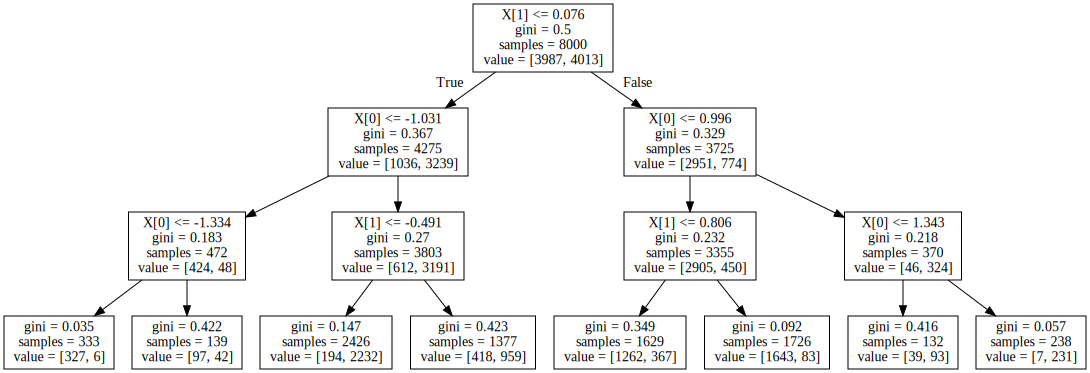

In [ ]:
from sklearn import tree
from IPython.display import display
import graphviz
#g_tree = export_graphviz(grid_cv.best_estimator_, out_file="moons_tree.dot", class_names= ["upper", "lower"], feature_names= ["x1", "x2"], impurity=False, filled=True)

display(graphviz.Source(tree.export_graphviz(clf)))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

%matplotlib inline

# plots decision boundary and scatter plot for a binary classifier
def plot_decision_bounday_binary(clf, X_train, y_train, X_test, y_test):

    # Get score on test set
    score = clf.score(X_test, y_test)

    h = 0.02
    x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
    y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5

    #print(x_min, x_max, y_min, y_max)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.jet
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    # Plot the training points
    ax = plt.subplot(1, 1,1)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, alpha=0.7)
    # and testing points
    #ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.jet, alpha=.8)

    # Plot also the training points
    #ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, alpha=0.6, linewidths=0.6, edgecolors="white")
    # and testing points
    #ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title("Decision boundary")
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'), size=15, horizontalalignment='right')

    figure = plt.figure(figsize=(12, 10))
    #figure.subplots_adjust(left=.02, right=.98)
    plt.show()

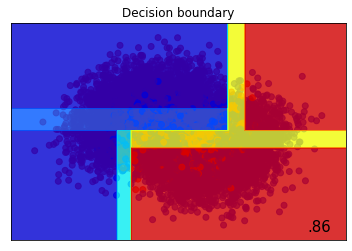

<Figure size 864x720 with 0 Axes>

In [ ]:
plot_decision_bounday_binary(grid_cv.best_estimator_, X_train, y_train, X_test, y_test)

In [ ]:
# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools



0.8115


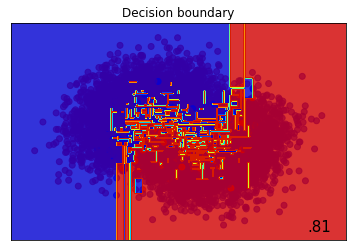

<Figure size 864x720 with 0 Axes>

In [ ]:

dt_clf_overfit = DecisionTreeClassifier()
dt_clf_overfit.fit(X_train, y_train)
y_pred = dt_clf_overfit.predict(X_test)
print(accuracy_score(y_test, y_pred))
plot_decision_bounday_binary(dt_clf_overfit, X_train, y_train, X_test, y_test)

In [ ]:
from sklearn.model_selection import ShuffleSplit
n_trees = 1000
n_instances  = 100
ss = ShuffleSplit(n_splits = n_trees, test_size = len(X_train) - n_instances, random_state = 42)
ss.get_n_splits(X)

1000

In [ ]:
from sklearn import clone

# create mini sets 
mini_sets = []
for train_index, test_index in ss.split(X_train):
    x_mini_train = X_train[train_index]
    y_mini_train = y_train[train_index]
    mini_sets.append((x_mini_train, y_mini_train))
#print(len(mini_sets))

# clone (deep copy) the estimator for use in 
estimators_forest = [ clone(grid_cv.best_estimator_) for _ in mini_sets]

# fit estimators and run predict to get accuracy scores
acc_scores = []
mini_sets_list = list(zip(*mini_sets))    # this will take the list of (two) tuples and return two lists, one for each of X and y mini sets
for x_train, y_train, est in zip(mini_sets_list[0], mini_sets_list[1], estimators_forest):
#for est, (x_train, y_train) in zip(estimators_forest, mini_sets):
    est.fit(x_train, y_train)
    y_pred = est.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    acc_scores.append(score)

np.mean(acc_scores)
#print(mini_sets_list[1])

0.8340495000000001

In [ ]:
from scipy.stats import mode

y_predictions_ = []
for x_train, y_train, est in zip(mini_sets_list[0], mini_sets_list[1], estimators_forest):
    est.fit(x_train, y_train)
    y_predictions_.append(est.predict(X_test)) 

y_pred = mode(y_predictions_,axis=0)[0].reshape(-1)
score = accuracy_score(y_test, y_pred)
print(score)

0.869
